In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df=pd.read_csv("googleplaystore.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

<Axes: ylabel='Frequency'>

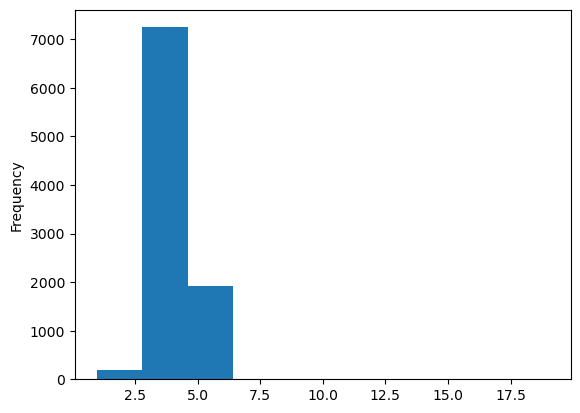

In [7]:
df['Rating'].plot.hist()

In [8]:
x=df.Rating.mean()
df.Rating.fillna(x,inplace=True)

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
dtype: int64

In [10]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [11]:
df.drop([10472],inplace=True)

In [12]:
df.Rating.max()

5.0

In [13]:
df.Size.value_counts(ascending= True)

371k                     1
840k                     1
186k                     1
319k                     1
683k                     1
                      ... 
13M                    191
14M                    194
12M                    196
11M                    198
Varies with device    1695
Name: Size, Length: 461, dtype: int64

In [14]:
def convert_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k'==size[:-1]:
        x=size[:-1]
        x=float(x)
        return(x)
    else:
        return None


In [15]:
df["Size"]=df["Size"].map(convert_size)

In [16]:
df.Size.head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

In [17]:
df.Size.isnull().sum()

2011

In [18]:
df.Size.fillna(method='ffill', inplace=True)

In [19]:
df.Reviews.dtype

dtype('O')

In [20]:
df.Reviews=df.Reviews.astype("int32")

In [21]:
df.Reviews.describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [22]:
df.Reviews.info()

<class 'pandas.core.series.Series'>
Int64Index: 10840 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10840 non-null  int32
dtypes: int32(1)
memory usage: 127.0 KB


In [23]:
df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [24]:
def remove_plusandcommas(val):
    return int(val.replace(",","").replace("+",""))

In [25]:
df.Installs=df.Installs.map(remove_plusandcommas)

In [26]:
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [27]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [28]:
df['Price'] = df.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [29]:
df.Price.describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [30]:
df.Rating.describe()

count    10840.000000
mean         4.191972
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [31]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2454,KBA-EZ Health Guide,MEDICAL,5.000000,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018"
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.193338,4,64000.0,1,Free,0.00,Everyone,Education,"July 17, 2018"
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.800000,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018"
5812,AX Watch for WatchMaker,PERSONALIZATION,4.193338,2,14000.0,1,Paid,0.99,Everyone,Personalization,"August 18, 2017"
5917,Ra Ga Ba,GAME,5.000000,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017"
6508,Sam.BN Pro,TOOLS,4.193338,11,2000.0,10,Paid,0.99,Everyone,Tools,"March 27, 2015"
6700,Brick Breaker BR,GAME,5.000000,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018"
7402,Trovami se ci riesci,GAME,5.000000,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017"
8591,DN Blog,SOCIAL,5.000000,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018"
9096,DZ Puzzle,FAMILY,4.193338,14,47000.0,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017"


In [32]:
df=df[df.Reviews<=df.Installs].copy()

In [33]:
df.shape

(10829, 11)

In [34]:
df[(df.Type == "Free") & (df.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [35]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(336, 11)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,"July 20, 2018"
266,Zenefits,BUSINESS,4.2,296,14000.0,50000,Free,0.0,Everyone,Business,"June 15, 2018"
267,Google Ads,BUSINESS,4.3,29313,20000.0,5000000,Free,0.0,Everyone,Business,"July 30, 2018"
268,Google My Business,BUSINESS,4.4,70991,20000.0,5000000,Free,0.0,Everyone,Business,"July 24, 2018"
269,Slack,BUSINESS,4.4,51507,20000.0,5000000,Free,0.0,Everyone,Business,"August 2, 2018"


In [36]:
duplicated_rows.App.value_counts()

Nick                                                  3
WatchESPN                                             3
theScore: Live Sports Scores, News, Stats & Videos    3
Skyscanner                                            3
O-Star                                                2
                                                     ..
Health and Nutrition Guide                            1
Food Calorie Calculator                               1
Lose It! - Calorie Counter                            1
Relax Meditation: Sleep with Sleep Sounds             1
AAFP                                                  1
Name: App, Length: 293, dtype: int64

In [37]:
df = df.drop_duplicates()

In [38]:
df.shape

(10493, 11)

In [39]:
df_apps_clean = df.drop_duplicates(subset=['App','Category','Type', 'Price','Last Updated'])

In [40]:
df_apps_clean['new'] = pd.to_datetime(df_apps_clean['Last Updated'])
df_apps_clean['lastupdate'] = (df_apps_clean['new'] - df_apps_clean['new'].max()).dt.days

C:\Users\Admin\AppData\Local\Temp\ipykernel_8156\767036127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean['new'] = pd.to_datetime(df_apps_clean['Last Updated'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8156\767036127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean['lastupdate'] = (df_apps_clean['new'] - df_apps_clean['new'].max()).dt.days


In [41]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",2018-06-20,-49


In [42]:
df_apps_clean.drop(['Last Updated', 'new'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8156\2304994596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean.drop(['Last Updated', 'new'], axis=1, inplace=True)


In [43]:
df_apps_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,-49


In [44]:
df_apps_clean.to_csv("df_apps_clean.csv", index=False)